Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Akshata Padalkar"
COLLABORATORS = ""

---

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\to$ Restart) and then **run all cells** (in the menubar, select Cell $\to$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>:Akshata Padalkar<br> 
<b>NetID</b>:anp178<br>
<b>Recitation #</b>:2<br>
<b>Notes to Grader</b> (optional):<br>
    Graphs may not show up in read only version, but once ran will work.
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: AP      (eg: NC for Naina Chaturvedi)

# CS 439 - Introduction to Data Science
### Spring 2025

## Lab 3 - EDA and Linear Algebra (100 points)
### Due Date: March 25th, 2025 on or before 11:59 PM

In this lab, you will explore EDA and Linear Algebra. This notebook has multiple tasks that you need to complete. To complete a task, just double click on the cell (notebook must be opened in Jupyter/CodeBench) and enter your answer. Be sure to save the notebook often (ctrl-S or cmd-S) and execute the cell (Shift-Enter) to make sure you code is saved and executes correctly.

### Lab Discussions
Post any questions regarding this lab to canvas discussion board on Lab 03 or visit office hours.

## Course Policies

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. You are not allowed to copy code from other notebooks. Attempting to submit code that is not yours can result in penalties and academic disciplinary actions. Please consult course staff for any clarification regarding collaboration policies.

**AI Policy**

We **only allow** the use of responsible **AI tool youchat** to help you find information as you write code to solve labs. The use of AI should be done cautiously. It **does not** free you from understanding the code you write. Being able to read, interpret and test code written by AI is required for you to answer questions in quizzes and exams. **DO NOT use** other AI tools such as chatGPT and Bard.

### Running a Cell 

Try running the following cell.  If you are unfamiliar with Jupyter Notebooks, consider skimming [this tutorial](https://docs.jupyter.org/en/latest/) or selecting **Help** in the menu above. TO run the cell below, place the cursor on the cell and press **(SHIFT-ENTER)** or choose Run from the Jupyter menu above.

## Part 1: EDA (50 Points)
### NOTE: Whenever an interpretation is asked, you must provide one to receive full points.

For this lab we'll be using iris dataset found in seaborn's dataset repository

In [21]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Task 1: Loading and Understanding the Dataset (10 Points)  
- **Task:** Load the Iris dataset from Seaborn and inspect the data.
- **Hint:** Use the `sns.load_dataset` function.  

In [22]:
# Write your code here
iris = sns.load_dataset('iris')
iris.info()
print(iris.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


#### What is the dataset about (briefly explain the columns)?

The Iris dataset contains 150 observations of iris flowers, each described by four numerical features and a categorical label indicating the species. The columns are: sepal_length which is the length of the sepal in centimeters, sepal_width which is the width of the sepal in centimeters, petal_length the length of the petal in centimeters, petal_width the width of the petal in centimeters, species – The species of the iris flower, which can be one of three types: setosa, versicolor, or virginica. 

### Task 2: Subplots (10 Points)  

- **Task:** Plot the distribution of `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` for each species.  
- **Requirement:** The plot must contain exactly **one figure** with **four subplots**—no more, no less.  

In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
titles = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs = axs.flatten()
for i, feature in enumerate(features):
    sns.boxplot(
        x='species', 
        y=feature, 
        data=iris, 
        ax=axs[i],
        hue = 'species'
    )
    axs[i].set_title(f'Distribution of {titles[i]} by Species')
    axs[i].set_xlabel('Species')
    axs[i].set_ylabel(f'{titles[i]} (cm)')

plt.tight_layout()
plt.show()

The boxplots display the distribution of sepal length, sepal width, petal length, and petal width for the three iris species: setosa, versicolor, and virginica. For sepal length, setosa has a smaller and more consistent sepal length compared to the other species. While virginica shows the highest median sepal length, while versicolor has intermediate values. For sepal width, setosa has a slightly wider range of sepal width, with a higher median compared to versicolor and virginica. With outliers in both the upper and lower bound. Versicolor and virginica show more overlap in their sepal width distribution. For petal length, setosa has significantly shorter petals compared to the other two species, setosa also has more lower bound outliers. Virginica has the longest petal length, while versicolor lies between the two. Finally, for petal width, similar to petal length, setosa shows a much narrower distribution, while versicolor and virginica have wider petal widths, with virginica having the largest. These visual patterns show that petal length and width provide the clearest separation between the three species, making them the most useful features for data analysis. 

### Task 3: Best Fit (10 Points)
- **Task**: Compare how `sepal_length` is related to `petal_length`, and draw a best fit line to show the trend.

In [ ]:
# Write your code here
plt.figure(figsize=(10, 6))
sns.regplot(x='sepal_length', y='petal_length', data=iris, marker='o', color='purple')
plt.title('Relationship between Sepal Length and Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

The scatter plot shows a positive linear relationship between sepal length and petal length in the Iris dataset. As the sepal length increases, the petal length tends to increase as well. The best-fit line highlights this trend, with most data points closely following the line, indicating a strong correlation between these two features. This suggests that sepal length can be a useful predictor of petal length in iris flowers.

### Task 4: Marking on the plot (10 Points)

- **Task**: Plot a graph for $f(x) = e^{-x}cos(2\pi x)$, and annotate the point $(1, f(1))$ with a arrow pointing at the point, saying **Second Peak**.

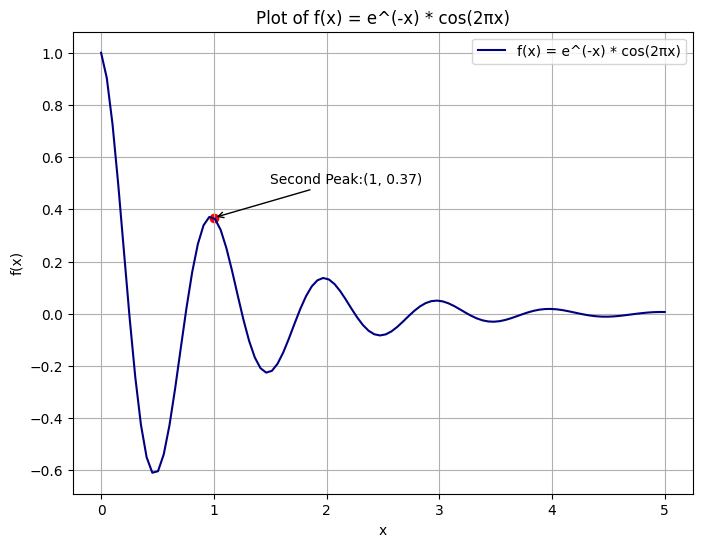

In [25]:
# Write your code here
x = np.linspace(0, 5, 100)
y = np.exp(-x) * np.cos(2 * np.pi * x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = e^(-x) * cos(2πx)', color='navy')

point_x = 1
point_y = np.exp(-point_x) * np.cos(2 * np.pi * point_x)

# Annotate the point (1, f(1))
plt.scatter(point_x, point_y, color='red')
plt.annotate(f'Second Peak:({point_x}, {point_y:.2f})', 
             xy=(point_x, point_y), 
             xytext=(1.5, 0.5), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)
plt.title('Plot of f(x) = e^(-x) * cos(2πx)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

### Task 5: Comparison Plots (5 Points)  

- **Task:** Visualize the correlation between all numerical features (excluding species) using graphs.  
- **Hint:** Use a **pair plot**.  

In [ ]:
# Write your code here
niris = iris.copy()
numerical_features = niris.drop(columns=['species'])
sns.pairplot(iris, hue = 'species', diag_kind='kde')
plt.show()

The pair plot provides a visual representation of the relationships between all numerical features in the Iris dataset: sepal_length, sepal_width, petal_length, and petal_width. Each scatter plot shows how two features relate to one another, while the diagonal plots show the distribution of individual features. 
From the pair plot, petal_length and petal_width exhibit a strong positive correlation, indicating that as petal length increases, petal width tends to increase as well. Similarly, sepal_length also shows a moderate positive correlation with petal_length and petal_width, suggesting that longer sepals tend to be associated with longer and wider petals.
In contrast, sepal_width shows little to no correlation with petal_length and petal_width, as evidenced by the scattered points without a clear pattern. 
The diagonal histograms highlight the distributions of individual features. Petal length and petal width have skewed distributions, whereas sepal length and sepal width appear more normally distributed. 

### Task 6: Exploration (5 Points)

- **Task**: Use any other python library except `matplotlib` and `seaborn`, and plot a graph that interests you using the `iris` dataset.

In [27]:
# Write your code here
import plotly.express as px
fig = px.scatter(
    iris, x='sepal_length', y='petal_length', size='petal_width', color='species', hover_name='species',
    title='Bubble Plot of Sepal Length vs. Petal Length',labels={'sepal_length': 'Sepal Length (cm)', 'petal_length': 'Petal Length (cm)','petal_width': 'Petal Width (cm)'}
)
fig.show()

Each bubble represents an observation, with the size of the bubble indicating the petal width.
Setosa species (blue) is clustered in the lower range of sepal and petal lengths, with smaller petal widths. Versicolor species (orange) shows moderate values for both sepal and petal lengths, with slightly larger bubbles. Virginica species (green) has the largest sepal and petal lengths, along with the widest petals, indicated by the largest bubbles.

## Part 2: Linear Algebra (10 Points)

In [28]:
# import necessary libraries
import numpy as np

In [29]:
np.vstack(([1, 2, 3], [3,4,5])).T @ np.array([1,1]).flatten()


array([4, 6, 8])

### Task 1: Linear Combinations (10 Points)
- **Task**: Given two vectors $v_1$ and $v_2$ and two scalars $a$ and $b$, Find the coefficient matrix $X$ and vector matrix $V$ such that $VX$ = $av_1 + b_v2$
- **HINT**: Each vector is one column of $V$

In [30]:
def linear_combination(v1, v2, a, b):
    """
    args:
    v1: a numpy array
    v2: a numpy array
    a: a scalar
    b: a scalar
    
    Returns: 
    A tuple of two numpy array where the first array is V and the array is X.
    """
    # Write your code here
    V = np.vstack((v1, v2)).T
    X = np.array([a, b])
    return V, X
        
# DO NOT MODIFY ANYTHING BELOW THIS LINE

try:
    v1 = np.array([1, 2, 3])
    v2 = np.array([4, 5, 6])
    V, X = linear_combination(v1, v2, 2, 3)
    res = (V @ X).flatten()
    assert res[0] == 14
    assert res[1] == 19
    assert res[2] == 24
    print("Test passed")
except Exception as e:
    print("OOPS! Try again\nError:", e)

Test passed


### Task 2: Eigenvalues and Eigenvectors (10 Points)

- **Task**: Find the eigenvalues and eigenvectors of the given matrix $A$.
- **Hint**: Use a function in numpy to find eigenvalues and eigenvectors.

In [31]:
# Code goes here
def find_eigens(A):
    """
    args: 
    A: a 2D numpy array
    
    Returns: 
    A tuple of two python lists: the first list contains the eigenvalues, and the second list contains the eigenvectors.
    """
    # Write your code here
    eigenvalues, eigenvectors = np.linalg.eig(A)
    #print(eigenvalues)
    #print(eigenvectors)
    return eigenvalues, eigenvectors

# DO NOT MODIFY ANYTHING BELOW THIS LINE

try:
    A = np.array([[1, 2], [3, 4]])
    eigenvalues, eigenvectors = find_eigens(A)
    assert round(eigenvalues[0], 2) == -0.37 and round(eigenvalues[1], 2) == 5.37
    assert round(eigenvectors[0][0], 2) == -0.82 and round(eigenvectors[0][1], 2) == -0.42
    assert round(eigenvectors[1][0], 2) == 0.57 and round(eigenvectors[1][1], 2) == -0.91
    print("Test passed")
except Exception as e:
    print("OOPS! Try again\nError:", e)

Test passed


### Task 3: Normalize (10 Points)

- **Task**: Given two vectors $v_1$ and $v_2$, compute the sum of their magnitudes.
- **Hint**: L2 norm of a vector gives it's magnitude.

In [32]:
# Code goes here
def sum_of_lengths(v1, v2):
    """
    args:
    v1: a numpy array
    v2: a numpy array
    
    Returns:
    The sum of the lengths of two vectors v1 and v2.
    """
    # Write your code here
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    return magnitude_v1 + magnitude_v2
# DO NOT MODIFY ANYTHING BELOW THIS LINE

try:
    v1 = np.array([4, 3, 2])
    v2 = np.array([1, 2, 4])
    result = sum_of_lengths(v1, v2)
    print(result)
    assert round(result, 2) == 9.97
    print("Test passed")
except Exception as e:
    print("OOPS! Try again\nError:", e)

9.967740502090344
Test passed


### Task 4: PCA (10 Points)

- **Task**: Perform Principal Component Analysis (PCA) on the Iris dataset to reduce `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` to two principal components.

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_transform(iris_data):
    """
    args: 
    iris_data: a pandas dataframe containing iris data
    
    returns: 
    A pandas dataframe containing the first two principal components and species columns only. New Pricipal Components should be named PC1 and PC2.
    """
    # Write your code here
    features = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_features)

    pca_df = pd.DataFrame(
        data=principal_components, 
        columns=['PC1', 'PC2']
    )
    pca_df['species'] = iris_data['species']
    
    return pca_df
    
    
# DO NOT MODIFY ANYTHING BELOW THIS LINE
    
try:
    iris_data = sns.load_dataset("iris")
    reduced_iris_data = pca_transform(iris_data)
    assert reduced_iris_data.shape == (150, 3)
    assert set(reduced_iris_data.columns) == {'PC1', 'PC2', 'species'}
    display(reduced_iris_data.head())
    print("Test passed, but check the data")
except Exception as e:
    print("OOPS! Try again\nError:", e)


,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


Test passed, but check the data


### Task 5: Plotting PCA (10 Points)
- **Task**: Visualize the relationship between species and the principal components obtained from PCA.

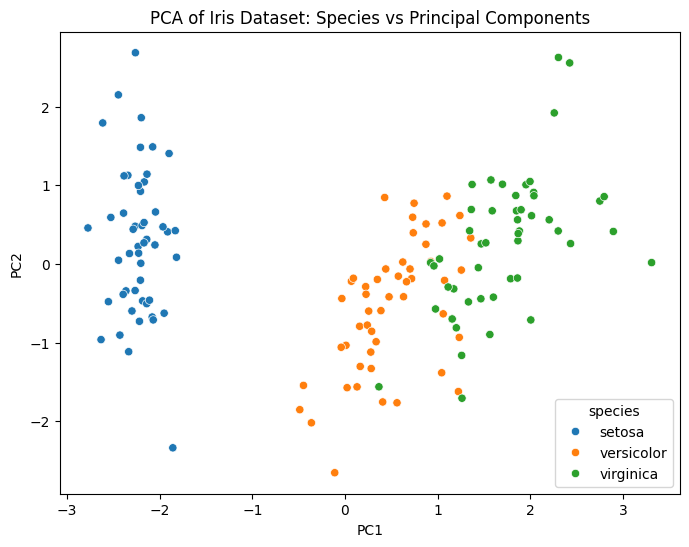

In [34]:
# Code goes here
pca_df = pca_transform(iris_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='species')
plt.title('PCA of Iris Dataset: Species vs Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please rename the file as netID_Lab_02_WebScapping_and_EDA (eg: netID = nc123)<br>
<b> Submit through: </b> CodeBench <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>